In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Outcome == 1 Diabetes = True
# Outcome == 0 Diabetes = False

data = pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


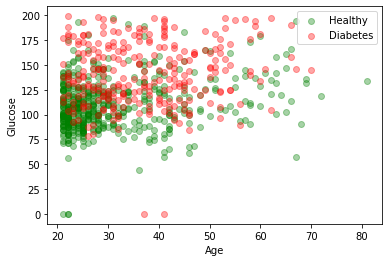

In [3]:
person_diabetes = data[data.Outcome == 1]
person_healthy = data[data.Outcome == 0]

#Let's we draw to our graph by looking at glucose for now.
#Our model will guess using other points at the last of our program.

plt.scatter(person_healthy.Age, person_healthy.Glucose, color ='green', label = 'Healthy', alpha = 0.35)
plt.scatter(person_diabetes.Age, person_diabetes.Glucose, color = 'red', label = 'Diabetes', alpha = 0.35)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()


In [4]:
# Let's determine the ordinates and abscissas
y = data.Outcome.values
x_raw_data = data.drop(["Outcome"], axis=1)
#We remove the outcome column(dependent variable) and leave only the independent variables.
#Because the KNN algorithms will group in the abscissas.

#To make normalization - We update all values into the x_raw_data as 0 and 1.
#If we don't make normalization like this, our KNN algorithm is failed.

x= (x_raw_data - np.min(x_raw_data))/(np.max(x_raw_data)-np.min(x_raw_data))

#Before

print('Raw datas before from the normalization:\n')
print(x_raw_data.head())

#After
print("\n\nOur datas training to AI after normalization: \n")
print(x.head())


Raw datas before from the normalization:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


Our datas training to AI after normalization: 

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       

C:\Users\Public\anaconda\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Public\anaconda\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [11]:
#We separate our train data with our test data.
#Our train data to be used for the system separation the healthy person with diabetes person.
#Our test data to be used for looking at the machine learning model succesbility's.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.01, random_state=1)

#To create the KNN model.
knn = KNeighborsClassifier(n_neighbors =3) #n_neighbors  = k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("The confirmation test result of our test data for K=3", knn.score(x_test, y_test))

#So how much should the "k" be?
#Let's to determine the "k".

counter = 1
for k in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = k)
    knn_new.fit(x_train, y_train)
    print(counter, " ", "Accuracy Rate: %", knn_new.score(x_test,y_test)*100)
    counter +=1


The confirmation test result of our test data for K=3 0.875
1   Accuracy Rate: % 75.0
2   Accuracy Rate: % 87.5
3   Accuracy Rate: % 87.5
4   Accuracy Rate: % 100.0
5   Accuracy Rate: % 75.0
6   Accuracy Rate: % 87.5
7   Accuracy Rate: % 75.0
8   Accuracy Rate: % 87.5
9   Accuracy Rate: % 87.5
10   Accuracy Rate: % 87.5


In [16]:
# To guess a new patient.
from sklearn.preprocessing import MinMaxScaler

#To make normalization - We used MİnMax Scaler to make faster normalization.
sc = MinMaxScaler()
sc.fit_transform(x_raw_data)

new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]


C:\Users\Public\anaconda\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Public\anaconda\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1